In [1]:
import matplotlib
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np
import diffimTests as dit

import warnings
warnings.filterwarnings('ignore')

import diffimTests as dit

In [2]:
# Normal, ZOGY fourier space
testResults1 = dit.multi.runTest(flux=620.*np.sqrt(2.), n_varSources=50, n_sources=15000,
                                templateNoNoise=False, skyLimited=False,
                                sky=[300., 300.], sourceFluxRange=(500,30000),
                                remeasurePsfs=[True, True], avoidAllOverlaps=0., 
                                variablesAvoidBorder=2.1, returnObjs=True, printErrs=True,
                                zogyImageSpace=False)

In [3]:
# Normal, ZOGY image space
testResults1a = dit.multi.runTest(flux=620.*np.sqrt(2.), n_varSources=50, n_sources=15000,
                                templateNoNoise=False, skyLimited=False,
                                sky=[300., 300.], sourceFluxRange=(500,30000),
                                remeasurePsfs=[True, True], avoidAllOverlaps=0., 
                                variablesAvoidBorder=2.1, returnObjs=True, printErrs=True,
                                zogyImageSpace=True)

In [4]:
# Old, ZOGY fourier space
testResults2 = dit.multi.runTestORIG(flux=620.*np.sqrt(2.), n_varSources=50, n_sources=15000,
                                #templateNoNoise=False, skyLimited=False,
                                sky=[300., 300.], #sourceFluxRange=(500,30000),
                                #remeasurePsfs=[True, True], #avoidAllOverlaps=0., 
                                returnObjs=True, printErrs=True)

In [5]:
print testResults1['resultInputPsf']
del testResults1['resultMeasuredPsf']['sources']
print testResults1['resultMeasuredPsf']

{'ZOGY': {'FP': 5, 'FN': 23, 'TP': 27}, 'ALstack': {'FP': 16, 'FN': 15, 'TP': 35}, 'SZOGY': {'FP': 10, 'FN': 26, 'TP': 24}, 'ALstack_decorr': {'FP': 1, 'FN': 24, 'TP': 26}}
{'ZOGY': {'FP': 5, 'FN': 28, 'TP': 22}, 'ALstack': {'FP': 15, 'FN': 15, 'TP': 35}, 'SZOGY': {'FP': 16, 'FN': 35, 'TP': 15}, 'ALstack_decorr': {'FP': 2, 'FN': 25, 'TP': 25}}


In [6]:
print testResults1a['resultInputPsf']
del testResults1a['resultMeasuredPsf']['sources']
print testResults1a['resultMeasuredPsf']

{'ZOGY': {'FP': 4, 'FN': 25, 'TP': 25}, 'ALstack': {'FP': 16, 'FN': 15, 'TP': 35}, 'SZOGY': {'FP': 6, 'FN': 29, 'TP': 21}, 'ALstack_decorr': {'FP': 1, 'FN': 24, 'TP': 26}}
{'ZOGY': {'FP': 6, 'FN': 30, 'TP': 20}, 'ALstack': {'FP': 15, 'FN': 15, 'TP': 35}, 'SZOGY': {'FP': 7, 'FN': 38, 'TP': 12}, 'ALstack_decorr': {'FP': 2, 'FN': 25, 'TP': 25}}


In [7]:
print testResults2['resultInputPsf']
print testResults2['resultMeasuredPsf']

{'ZOGY': {'FP': 5, 'FN': 23, 'TP': 27}, 'ALstack': {'FP': 16, 'FN': 15, 'TP': 35}, 'SZOGY': {'FP': 10, 'FN': 26, 'TP': 24}, 'ALstack_decorr': {'FP': 1, 'FN': 24, 'TP': 26}}
{'ZOGY': {'FP': 5, 'FN': 28, 'TP': 22}, 'ALstack': {'FP': 15, 'FN': 15, 'TP': 35}, 'SZOGY': {'FP': 16, 'FN': 35, 'TP': 15}, 'ALstack_decorr': {'FP': 2, 'FN': 25, 'TP': 25}}


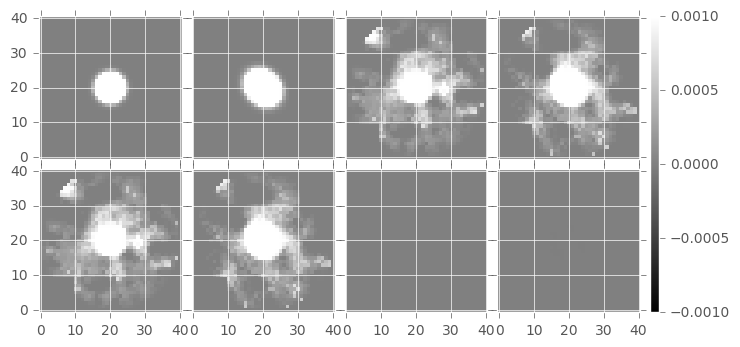

In [8]:
dit.plotImageGrid((testResults1a['objs'][0].im1.psf, testResults1a['objs'][0].im2.psf,
                   testResults1a['objs'][1].im1.psf, testResults1a['objs'][1].im2.psf,
                   testResults2['objs'][1].im1.psf, testResults2['objs'][1].im2.psf,
                   testResults1a['objs'][1].im1.psf - testResults2['objs'][1].im1.psf,
                   testResults1a['objs'][1].im2.psf - testResults2['objs'][1].im2.psf), clim=(-0.001, 0.001))

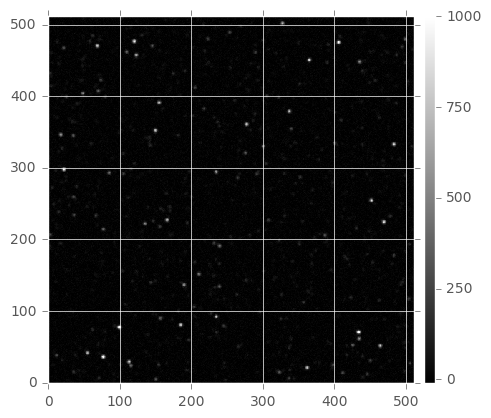

In [9]:
dit.plotImageGrid((testResults1['objs'][1].im1.im,), imScale=5, clim=(-10, 1000))

stats(mean=0.00071661545981468685, stdev=3.9524591447697044, min=-16.861767924261617, max=17.93300113301019)


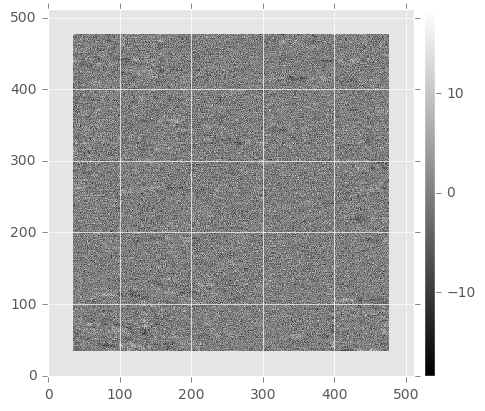

In [10]:
print dit.computeClippedImageStats(testResults1['objs'][1].D_ZOGY.im - testResults1a['objs'][1].D_ZOGY.im)
dit.plotImageGrid((testResults1['objs'][1].D_ZOGY.im - testResults1a['objs'][1].D_ZOGY.im,), imScale=5)

In [11]:
testResults1['objs'][0].reset()
print testResults1['objs'][0].runTest(zogyImageSpace=False);
testResults1a['objs'][0].reset()
print testResults1a['objs'][0].runTest(zogyImageSpace=True);

{'ZOGY': {'FP': 5, 'FN': 29, 'TP': 21}, 'ALstack': {'FP': 8, 'FN': 21, 'TP': 29}, 'SZOGY': {'FP': 8, 'FN': 33, 'TP': 17}, 'ALstack_decorr': {'FP': 4, 'FN': 35, 'TP': 15}}
{'ZOGY': {'FP': 5, 'FN': 32, 'TP': 18}, 'ALstack': {'FP': 8, 'FN': 21, 'TP': 29}, 'SZOGY': {'FP': 8, 'FN': 38, 'TP': 12}, 'ALstack_decorr': {'FP': 4, 'FN': 35, 'TP': 15}}


stats(mean=2.1581489750864307e-08, stdev=3.7236283126775389e-05, min=-0.00031579435659878641, max=0.0003022541013546487)


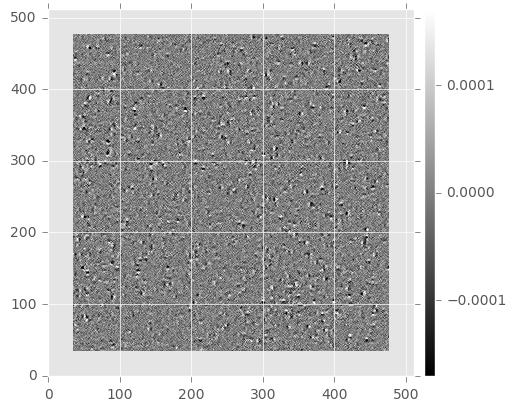

In [12]:
print dit.computeClippedImageStats(testResults1['objs'][0].D_ZOGY.im - testResults1a['objs'][0].D_ZOGY.im)
dit.plotImageGrid((testResults1['objs'][0].D_ZOGY.im - testResults1a['objs'][0].D_ZOGY.im,), imScale=5)

### Result: ZOGY(image space) works better with a bigger `padSize` and removing the "un-padding" (lines 90-93 of `zogy.py`). But it is still not as good as ZOGY(F-space).

```
ZOGY image space -- 
padSize=7, dont remove padding:
{'ZOGY': {'FP': 5, 'FN': 24, 'TP': 26}, 'ALstack': {'FP': 16, 'FN': 15, 'TP': 35}, 'SZOGY': {'FP': 8, 'FN': 28, 'TP': 22}, 'ALstack_decorr': {'FP': 1, 'FN': 24, 'TP': 26}}
{'ZOGY': {'FP': 8, 'FN': 28, 'TP': 22}, 'ALstack': {'FP': 15, 'FN': 15, 'TP': 35}, 'SZOGY': {'FP': 8, 'FN': 35, 'TP': 15}, 'ALstack_decorr': {'FP': 2, 'FN': 25, 'TP': 25}}

padSize=15, dont remove padding:
{'ZOGY': {'FP': 4, 'FN': 25, 'TP': 25}, 'ALstack': {'FP': 16, 'FN': 15, 'TP': 35}, 'SZOGY': {'FP': 6, 'FN': 29, 'TP': 21}, 'ALstack_decorr': {'FP': 1, 'FN': 24, 'TP': 26}}
{'ZOGY': {'FP': 6, 'FN': 30, 'TP': 20}, 'ALstack': {'FP': 15, 'FN': 15, 'TP': 35}, 'SZOGY': {'FP': 7, 'FN': 38, 'TP': 12}, 'ALstack_decorr': {'FP': 2, 'FN': 25, 'TP': 25}}

padSize=35, dont remove padding:
{'ZOGY': {'FP': 3, 'FN': 30, 'TP': 20}, 'ALstack': {'FP': 16, 'FN': 15, 'TP': 35}, 'SZOGY': {'FP': 5, 'FN': 38, 'TP': 12}, 'ALstack_decorr': {'FP': 1, 'FN': 24, 'TP': 26}}
{'ZOGY': {'FP': 4, 'FN': 34, 'TP': 16}, 'ALstack': {'FP': 15, 'FN': 15, 'TP': 35}, 'SZOGY': {'FP': 5, 'FN': 40, 'TP': 10}, 'ALstack_decorr': {'FP': 2, 'FN': 25, 'TP': 25}}
```


#### Is ZOGY working when template is less noisy?

Seems that ZOGY does not work as well (more false positives, fewer detections) when template is less noisy but *only for measured PSFs*

In [13]:
# Normal, ZOGY fourier space, less noisy template
testResults3 = dit.multi.runTest(flux=620.*np.sqrt(2.), n_varSources=50, n_sources=15000,
                                templateNoNoise=False, skyLimited=False,
                                sky=[30., 300.], sourceFluxRange=(500,30000),
                                remeasurePsfs=[True, True], avoidAllOverlaps=0., 
                                variablesAvoidBorder=2.1, returnObjs=True, printErrs=True,
                                zogyImageSpace=False)

In [14]:
# Noisy template (sky = 300)
print testResults1['resultInputPsf']
#del testResults1['resultMeasuredPsf']['sources']
print testResults1['resultMeasuredPsf']

{'ZOGY': {'FP': 5, 'FN': 23, 'TP': 27}, 'ALstack': {'FP': 16, 'FN': 15, 'TP': 35}, 'SZOGY': {'FP': 10, 'FN': 26, 'TP': 24}, 'ALstack_decorr': {'FP': 1, 'FN': 24, 'TP': 26}}
{'ZOGY': {'FP': 5, 'FN': 28, 'TP': 22}, 'ALstack': {'FP': 15, 'FN': 15, 'TP': 35}, 'SZOGY': {'FP': 16, 'FN': 35, 'TP': 15}, 'ALstack_decorr': {'FP': 2, 'FN': 25, 'TP': 25}}


In [15]:
# Less noisy template (sky = 30), ZOGY not image-space
print testResults3['resultInputPsf']
del testResults3['resultMeasuredPsf']['sources']
print testResults3['resultMeasuredPsf']

{'ZOGY': {'FP': 4, 'FN': 10, 'TP': 40}, 'ALstack': {'FP': 5, 'FN': 8, 'TP': 42}, 'SZOGY': {'FP': 3, 'FN': 6, 'TP': 44}, 'ALstack_decorr': {'FP': 4, 'FN': 12, 'TP': 38}}
{'ZOGY': {'FP': 29, 'FN': 16, 'TP': 34}, 'ALstack': {'FP': 6, 'FN': 9, 'TP': 41}, 'SZOGY': {'FP': 11, 'FN': 19, 'TP': 31}, 'ALstack_decorr': {'FP': 5, 'FN': 14, 'TP': 36}}


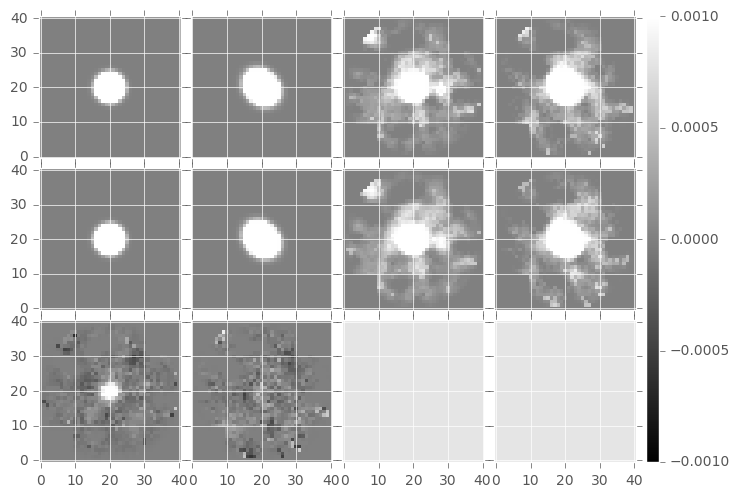

In [16]:
dit.plotImageGrid((testResults1['objs'][0].im1.psf, testResults1['objs'][0].im2.psf,
                   testResults1['objs'][1].im1.psf, testResults1['objs'][1].im2.psf,
                   testResults3['objs'][0].im1.psf, testResults3['objs'][0].im2.psf,
                   testResults3['objs'][1].im1.psf, testResults3['objs'][1].im2.psf,
                   testResults1['objs'][1].im1.psf - testResults3['objs'][1].im1.psf,
                   testResults1['objs'][1].im2.psf - testResults3['objs'][1].im2.psf), clim=(-0.001, 0.001))

In [17]:
print dit.computeClippedImageStats(testResults1['objs'][1].D_ZOGY.im)
print dit.computeClippedImageStats(testResults3['objs'][1].D_ZOGY.im)
print dit.computeClippedImageStats(testResults1['objs'][1].D_ZOGY.var)
print dit.computeClippedImageStats(testResults3['objs'][1].D_ZOGY.var)
#print dit.computeClippedImageStats(testResults1['objs'][1].D_ZOGY.im - testResults3['objs'][1].D_ZOGY.im)
print np.sqrt(300+300), np.sqrt(300+30)
#dit.plotImageGrid((testResults1['objs'][1].D_ZOGY.im - testResults3['objs'][1].D_ZOGY.im,), imScale=5)

stats(mean=0.10149572611931412, stdev=24.516239005131521, min=-133.87637778725079, max=136.29649027543869)
stats(mean=0.15393663756775539, stdev=18.508706224672686, min=-169.47474585776052, max=85.216087060777056)
stats(mean=605.0381323050168, stdev=27.359927408042836, min=489.87442369792996, max=2747.2095920341899)
stats(mean=334.27108585573825, stdev=21.23649332897325, min=234.63798318880853, max=2304.0718501308256)
24.4948974278 18.1659021246


In [18]:
# Normal, ZOGY fourier space, less noisy template, but dont re-fit its PSF
testResults3a = dit.multi.runTest(flux=620.*np.sqrt(2.), n_varSources=50, n_sources=15000,
                                templateNoNoise=False, skyLimited=False,
                                sky=[30., 300.], sourceFluxRange=(500,30000),
                                remeasurePsfs=[False, True], avoidAllOverlaps=0., 
                                variablesAvoidBorder=2.1, returnObjs=True, printErrs=True,
                                zogyImageSpace=False)

In [19]:
# Less noisy template (sky = 30), ZOGY not image-space, don't re-fit template PSF
print testResults3a['resultInputPsf']
del testResults3a['resultMeasuredPsf']['sources']
print testResults3a['resultMeasuredPsf']

{'ZOGY': {'FP': 4, 'FN': 10, 'TP': 40}, 'ALstack': {'FP': 5, 'FN': 8, 'TP': 42}, 'SZOGY': {'FP': 3, 'FN': 6, 'TP': 44}, 'ALstack_decorr': {'FP': 4, 'FN': 12, 'TP': 38}}
{'ZOGY': {'FP': 73, 'FN': 26, 'TP': 24}, 'ALstack': {'FP': 5, 'FN': 8, 'TP': 42}, 'SZOGY': {'FP': 52, 'FN': 22, 'TP': 28}, 'ALstack_decorr': {'FP': 2, 'FN': 11, 'TP': 39}}


In [22]:
# Compate it to the same but don't refit EITHER psf.
testResults3b = dit.multi.runTest(flux=620.*np.sqrt(2.), n_varSources=50, n_sources=15000,
                                templateNoNoise=False, skyLimited=False,
                                sky=[30., 300.], sourceFluxRange=(500,30000),
                                remeasurePsfs=[False, False], avoidAllOverlaps=0., 
                                variablesAvoidBorder=2.1, returnObjs=True, printErrs=True,
                                zogyImageSpace=False)

In [24]:
print testResults3b['resultInputPsf']
#del testResults3b['resultMeasuredPsf']['sources']
print testResults3b['resultMeasuredPsf']

{'ZOGY': {'FP': 7, 'FN': 19, 'TP': 31}, 'ALstack': {'FP': 9, 'FN': 17, 'TP': 33}, 'SZOGY': {'FP': 13, 'FN': 23, 'TP': 27}, 'ALstack_decorr': {'FP': 8, 'FN': 24, 'TP': 26}}
None


stats(mean=0.10149572611931412, stdev=24.516239005131521, min=-133.87637778725079, max=136.29649027543869)
stats(mean=0.15393663756775539, stdev=18.508706224672686, min=-169.47474585776052, max=85.216087060777056)
stats(mean=-0.14930658319857956, stdev=19.141927799875383, min=-106.79814459743118, max=260.12214825720747)
stats(mean=605.0381323050168, stdev=27.359927408042836, min=489.87442369792996, max=2747.2095920341899)
stats(mean=334.27108585573825, stdev=21.23649332897325, min=234.63798318880853, max=2304.0718501308256)
stats(mean=335.58271857997806, stdev=21.433152954881496, min=249.9557608435417, max=2045.5684486362659)
24.4948974278 18.1659021246
stats(mean=0.19925155681896267, stdev=29.13185357722212, min=-238.49572151147129, max=159.64195647035365)


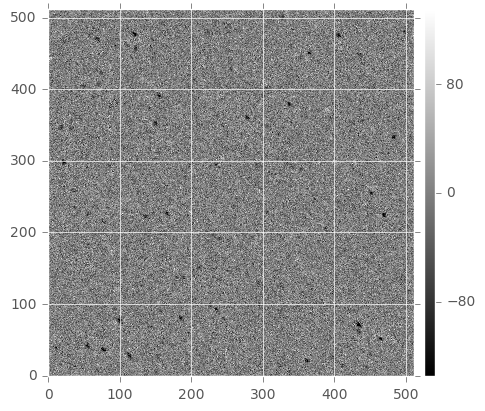

In [31]:
print dit.computeClippedImageStats(testResults1['objs'][1].D_ZOGY.im)
print dit.computeClippedImageStats(testResults3['objs'][1].D_ZOGY.im)
print dit.computeClippedImageStats(testResults3a['objs'][1].D_ZOGY.im)
print dit.computeClippedImageStats(testResults1['objs'][1].D_ZOGY.var)
print dit.computeClippedImageStats(testResults3['objs'][1].D_ZOGY.var)
print dit.computeClippedImageStats(testResults3a['objs'][1].D_ZOGY.var)
#print dit.computeClippedImageStats(testResults1['objs'][1].D_ZOGY.im - testResults3['objs'][1].D_ZOGY.im)
print np.sqrt(300+300), np.sqrt(300+30)
#dit.plotImageGrid((testResults1['objs'][1].D_ZOGY.im - testResults3['objs'][1].D_ZOGY.im,), imScale=5)

print dit.computeClippedImageStats(testResults3b['objs'][0].D_ZOGY.im - testResults3a['objs'][1].D_ZOGY.im)
dit.plotImageGrid((testResults3b['objs'][0].D_ZOGY.im - testResults3a['objs'][1].D_ZOGY.im,), imScale=5)